# _Linear Regression Lab 3 — Kevin Wong_#

In [1]:
%load_ext rpy2.ipython
import rpy2.rinterface 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="whitegrid")

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import summary_table
import scipy.stats as stats
from scipy.stats import t as tdist

/Users/kevinwong2014/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


** Dataset Context **

We consider the Boston housing dataset. This dataset records the median house value and several other variables for 506 neighborhoods around Boston in 1978. Specifically, the dataset
contains observations from the following variables:
- crim: per capita crime rate
- zn: proportion of residential land zoned for lots over 25,000 sq. ft.
- indus: proportion of non-retail business acreage
- chas: dummy variable indicating whether the neighborhood is adjacent to the Charles River (1) or not (0)
- nox: nitrogen oxide pollution concentration (parts per 10 million)
- rm: average number of rooms per house
- age: proportion of owner-occupied houses built prior to 1940
- dis: weighted mean of distance to five Boston employment centers
- rad: index of accessibility to radial highways
- tax: property tax rate per \$10,000
- ptratio: pupil-teacher ratio
- lstat: percent of population that have a “low” socioeconomic status
- medv: median value of owner-occupied houses in $1000s

Interest lies in understanding which factors influence the value of a house – and how they influence the value of a house. Interest also lies in predicting the value of a house in a neighborhood with specific traits.

**Importing Data in Python and R**

In [2]:
df = pd.read_csv("boston.csv") 
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9


In [3]:
%%R

df <- read.csv("boston.csv", header = T)
df[1:10,]

      crim   zn indus chas   nox    rm   age    dis rad tax ptratio lstat medv
1  0.00632 18.0  2.31    0 0.538 6.575  65.2 4.0900   1 296    15.3  4.98 24.0
2  0.02731  0.0  7.07    0 0.469 6.421  78.9 4.9671   2 242    17.8  9.14 21.6
3  0.02729  0.0  7.07    0 0.469 7.185  61.1 4.9671   2 242    17.8  4.03 34.7
4  0.03237  0.0  2.18    0 0.458 6.998  45.8 6.0622   3 222    18.7  2.94 33.4
5  0.06905  0.0  2.18    0 0.458 7.147  54.2 6.0622   3 222    18.7  5.33 36.2
6  0.02985  0.0  2.18    0 0.458 6.430  58.7 6.0622   3 222    18.7  5.21 28.7
7  0.08829 12.5  7.87    0 0.524 6.012  66.6 5.5605   5 311    15.2 12.43 22.9
8  0.14455 12.5  7.87    0 0.524 6.172  96.1 5.9505   5 311    15.2 19.15 27.1
9  0.21124 12.5  7.87    0 0.524 5.631 100.0 6.0821   5 311    15.2 29.93 16.5
10 0.17004 12.5  7.87    0 0.524 6.004  85.9 6.5921   5 311    15.2 17.10 18.9


***
**A) Fit a multiple linear regression model relating medv to the twelve explanatory
variables listed above and calculate and interpret that value of $R^2$.
 **

In [4]:
# using statsmodels' automated least squares function to fit a multiple linear regression model on the data
model_full = smf.ols("medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + lstat", data = df).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 17 Oct 2018   Prob (F-statistic):          2.23e-133
Time:                        08:33:01   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
%%R
model_full <- lm(medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + lstat, data = df)
summary(model_full)


Call:
lm(formula = medv ~ crim + zn + indus + chas + nox + rm + age + 
    dis + rad + tax + ptratio + lstat, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1304  -2.7673  -0.5814   1.9414  26.2526 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  41.617270   4.936039   8.431 3.79e-16 ***
crim         -0.121389   0.033000  -3.678 0.000261 ***
zn            0.046963   0.013879   3.384 0.000772 ***
indus         0.013468   0.062145   0.217 0.828520    
chas          2.839993   0.870007   3.264 0.001173 ** 
nox         -18.758022   3.851355  -4.870 1.50e-06 ***
rm            3.658119   0.420246   8.705  < 2e-16 ***
age           0.003611   0.013329   0.271 0.786595    
dis          -1.490754   0.201623  -7.394 6.17e-13 ***
rad           0.289405   0.066908   4.325 1.84e-05 ***
tax          -0.012682   0.003801  -3.337 0.000912 ***
ptratio      -0.937533   0.132206  -7.091 4.63e-12 ***
lstat        -0.552019   0.050659 -10.897  <

<b> Interpretation of $R^2$ </b>

In both Python and R, we observe an $R^2$ of 0.7343.  This quantifies the proportion of variation observed in y  $\sum(y_i - \bar{y})^2$ explained by the model.  Simply, this means that the multiple linear regression (MLR) model explains 73% of the variation in y.

---
** B) Drop the explanatory variable indus (proportion of industrial business acreage) from the model above – and calculate and interpret that value of $R^2$.** 
 

In [6]:
model_red_indus = smf.ols("medv ~ crim + zn + chas + nox + rm + age + dis + rad + tax + ptratio + lstat", data = df).fit()
model_red_indus.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     124.1
Date:                Wed, 17 Oct 2018   Prob (F-statistic):          2.00e-134
Time:                        08:33:01   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     494   BIC:                             3085.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5437      4.920      8.445      0.000      31.878      51.210
crim          -0.1216      0.033     -3.691      0.000      -0.186      -0.057
zn             0.0466      0.014      3.383      0.001       0.020       0.074
chas           2.8591      0.865      3.307      0.001       1.160       4.558
nox          -18.5349      3.708     -4.999      0.000     -25.819     -11.250
rm             3.6500      0.418      8.728      0.000       2.828       4.472
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.5000      0.197     -7.617      0.000      -1.887      -1.113
rad            0.2854      0.064      4.443      0.000       0.159       0.412
tax           -0.0123      0.003     -3.611      0.000      -0.019      -0.006
ptratio       -0.9338      0.131     -7.130      0.000      -1.191      -0.676
lstat         -0.5511      0.050    -10.927      0.000      -0.650      -0.452
==============================================================================
Omnibus:                      171.179   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.910
Skew:                           1.477   Prob(JB):                    4.24e-155
Kurtosis:                       7.999   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
%%R
model_red_indus <- lm(medv ~ crim + zn + chas + nox + rm + age + dis + rad + tax + ptratio + lstat, data = df)
summary(model_red_indus)


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + age + dis + 
    rad + tax + ptratio + lstat, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1267  -2.7487  -0.5902   1.9056  26.2609 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  41.543721   4.919606   8.445 3.42e-16 ***
crim         -0.121628   0.032950  -3.691 0.000248 ***
zn            0.046642   0.013786   3.383 0.000773 ***
chas          2.859128   0.864680   3.307 0.001013 ** 
nox         -18.534872   3.707573  -4.999 8.01e-07 ***
rm            3.650015   0.418175   8.728  < 2e-16 ***
age           0.003608   0.013317   0.271 0.786563    
dis          -1.499953   0.196913  -7.617 1.33e-13 ***
rad           0.285390   0.064231   4.443 1.09e-05 ***
tax          -0.012320   0.003411  -3.611 0.000336 ***
ptratio      -0.933839   0.130976  -7.130 3.59e-12 ***
lstat        -0.551115   0.050438 -10.927  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05

<b> Interpretation of New $R^2$ Value </b>

In both languages, we again observe an $R^2$ of 0.7343. $R^2$ remains the exact same value with and without indus as an explanatory variable.  We draw the conclusion that this variable provides no significant additional explanatory power to our model, as $R^2$ did not decrease as we might have expected.  Consequently, this supports the notion that we can drop this variable from our final model.

---
** C) Now drop a second additional explanatory variable — age — and interpret the value of $R^2$. **

In [8]:
model_red_indus_age = smf.ols("medv ~ crim + zn + chas + nox + rm + dis + rad + tax + ptratio + lstat", data = df).fit()
model_red_indus_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Wed, 17 Oct 2018   Prob (F-statistic):          1.73e-135
Time:                        08:33:01   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.4517      4.903      8.454      0.000      31.818      51.086
crim          -0.1217      0.033     -3.696      0.000      -0.186      -0.057
zn             0.0462      0.014      3.378      0.001       0.019       0.073
chas           2.8719      0.863      3.329      0.001       1.177       4.567
nox          -18.2624      3.565     -5.122      0.000     -25.267     -11.258
rm             3.6730      0.409      8.978      0.000       2.869       4.477
dis           -1.5160      0.188     -8.078      0.000      -1.885      -1.147
rad            0.2839      0.064      4.440      0.000       0.158       0.410
tax           -0.0123      0.003     -3.608      0.000      -0.019      -0.006
ptratio       -0.9310      0.130     -7.138      0.000      -1.187      -0.675
lstat         -0.5465      0.047    -11.519      0.000      -0.640      -0.453
==============================================================================
Omnibus:                      172.594   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.971
Skew:                           1.486   Prob(JB):                    2.28e-158
Kurtosis:                       8.060   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
%%R
model_red_indus_age <- lm(medv ~ crim + zn + chas + nox + rm + dis + rad + tax + ptratio + lstat, data = df)
summary(model_red_indus_age)


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + lstat, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1814  -2.7625  -0.6243   1.8448  26.3920 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  41.451747   4.903283   8.454 3.18e-16 ***
crim         -0.121665   0.032919  -3.696 0.000244 ***
zn            0.046191   0.013673   3.378 0.000787 ***
chas          2.871873   0.862591   3.329 0.000935 ***
nox         -18.262427   3.565247  -5.122 4.33e-07 ***
rm            3.672957   0.409127   8.978  < 2e-16 ***
dis          -1.515951   0.187675  -8.078 5.08e-15 ***
rad           0.283932   0.063945   4.440 1.11e-05 ***
tax          -0.012292   0.003407  -3.608 0.000340 ***
ptratio      -0.930961   0.130423  -7.138 3.39e-12 ***
lstat        -0.546509   0.047442 -11.519  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.789 on 495 degrees

<b> Interpretation of New $R^2$ Value </b>

Once again, we observe an unchanged $R^2$ of 0.7343. This supports the idea that both age and indus as explanatory variables contribute effectively nothing to the explanatory power of the model and can both be dropped.

--- 
** D) By commenting on $R^2$ values and relevant p-values, comment on whether the proportion of industrial land in a neighborhood and the neighborhood’s age significantly influence the median value of a house in that neighborhood. **

Taking a look at the full model's summary from part A, we observe extremely high p-values of 0.829 and 0.787 corresponding to indus and age.  As these p-values represent the probability that we have observed our results under the assumption of the null hypothesis, ie that the $\beta_i$'s are in fact 0, we have sufficient statistical evidence to assume that the null hypothesis is true.  Namely, that these variables do not affect the median value of a household.  The unchanged nature of $R^2$ when dropping these variables from our model lends further support. 

---
** E) Use the additional sum of squares principle to formally test** <b> $𝐻_0: \beta_3 = \beta_7 = 0$  vs  $H_A: \beta_j \neq 0$
for j = 3, 7 </b><br> 
** and draw a conclusion, at a 5% level of significance, regarding whether indus and age significantly influence medv. **

In [10]:
# compute F-statistic
SSE_full = model_full.ssr
SSE_red = model_red_indus_age.ssr
l = 2
n = len(df)
p = 12
F0 = ((SSE_red - SSE_full)/l) / (SSE_full / (n-p-1))
pval = 1 - stats.f.cdf(F0, dfn = l, dfd = n-p-1)

print("P-value associated with this test:", pval)

P-value associated with this test: 0.941666408961


In [11]:
%%R
SSE_full <- anova(model_full)$'Sum Sq'[13]
SSE_red <- anova(model_red_indus_age)$'Sum Sq'[11]
l <- 2
n <- nrow(df)
p <- 12
F0 <- ((SSE_red - SSE_full)/l) / (SSE_full / (n-p-1))
pval <- pf(q = F0, df1 = l, df2 = n-p-1, lower.tail = F)

paste("P-value associated with this test:", pval)

[1] "P-value associated with this test: 0.941666408960469"


<b> Hypothesis Test Conclusions </b>

Assuming the null hypothesis that variables indus and age have no effect on the median value of homes, our F-statistic is insignificant and very small.  The resulting p-value associated with this F-statistic gives no evidence to reject the null hypothesis.  Thus, we can confidently say that these variables have no effect on median house value. 

---
** F) Intepreting Regression Coefficients in the Context of the Reduced Model **

In [12]:
# recalling model summary for reference
model_red_indus_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Wed, 17 Oct 2018   Prob (F-statistic):          1.73e-135
Time:                        08:33:02   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.4517      4.903      8.454      0.000      31.818      51.086
crim          -0.1217      0.033     -3.696      0.000      -0.186      -0.057
zn             0.0462      0.014      3.378      0.001       0.019       0.073
chas           2.8719      0.863      3.329      0.001       1.177       4.567
nox          -18.2624      3.565     -5.122      0.000     -25.267     -11.258
rm             3.6730      0.409      8.978      0.000       2.869       4.477
dis           -1.5160      0.188     -8.078      0.000      -1.885      -1.147
rad            0.2839      0.064      4.440      0.000       0.158       0.410
tax           -0.0123      0.003     -3.608      0.000      -0.019      -0.006
ptratio       -0.9310      0.130     -7.138      0.000      -1.187      -0.675
lstat         -0.5465      0.047    -11.519      0.000      -0.640      -0.453
==============================================================================
Omnibus:                      172.594   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.971
Skew:                           1.486   Prob(JB):                    2.28e-158
Kurtosis:                       8.060   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- <b> Intercept </b>: Corresponding to the mathematical $\beta_0$ of 41.4517, we interpret this as the model's expected median house value of approximately \$41,000 if all other $\beta_i$'s are held at 0.  However, interpretability is limited as setting several $\beta_i$'s = 0 is improbable or non-sensical. 
- <b> Crim </b>:  The model expects a decrease of approximately 0.1217 * \$1,000 = \$121 in house value for each additional percentage increase in crime rate — all else held constant (ommitted but also assumed in following explanations). 
- <b> Zn </b>:  The model expects a slight increase of $46 in median house value for each additional percentage increase in proportion of residential zoned lots in the neighborhood of over 25,000 sq. ft.  
- <b> Chas </b>:  Neighborhoods next to the Charles River have an expected \$2,871 increase in median house value compared to neighborhoods that are not.  
- <b> Nox </b>: For each additional ppm10 of nitrogen oxide pollution, there is an expected decrease of \$18,262 in median home value.  However, values range between 0.385 and 0.871 so the true decrease is not as dramatic.
- <b> Rm </b>: For each additional average room number in a neighborhood adds an expected increase of \$3,673 to median home value. 
- <b> Tax </b>: The model expects a decrease of \$12.30 in median home value for each additional property tax rate per \$10,000.
- <b> Ptratio </b>: For every additional student increase in the neighborhood's student:teacher ratio, there is an expected decrease in home value of \$931.  
- <b> Lstat </b>: For each additional percentage of the population that has a low socioeconomic status, there is an expected decrease in home value of \$546. 

---
** G) In the context of the reduced model (i.e., without indus and age), provide a point prediction (and a 95% prediction interval) for the median house value in a neighborhood for which: ** 
crim = 5,
zn = 25,
chas= 0,
nox= 0.6,
rm = 3,
dis= 4,
rad = 10,
tax = 500,
ptratio = 20, and 
lstat = 5

In [13]:
# manually computing point prediction
pred = 41.4517 + 5*-0.1217 + 25*0.0462 + 0*2.8719 + 0.6*-18.2624 + 3*3.6730 + 4*-1.5160 + 10*0.2839 + 500*-0.0123 + 20*-0.9310 + 5*-0.5465

In [14]:
medv = df["medv"]

sxx = n * np.var(medv)
sigma_hat_lse = 4.789
crit_val = tdist.ppf(0.975, df = n - 2)
se_yp = sigma_hat_lse * np.sqrt(1 + (1/n) + ((pred-np.mean(medv))**2/sxx))
yp_hat = pred

print("95% Prediction Upper Limit: ", yp_hat + crit_val * se_yp)
print("Predicted Hourly Rentals: ", yp_hat)
print("95% Prediction Lower Limit: ", yp_hat - crit_val * se_yp)

95% Prediction Upper Limit:  20.7642073941
Predicted Hourly Rentals:  11.332260000000003
95% Prediction Lower Limit:  1.90031260593


In [15]:
%%R
predict(object = model_red_indus_age, newdata = data.frame(crim = 5, zn = 25, chas= 0, nox= 0.6, rm = 3, dis= 4, rad = 10, tax = 500, ptratio = 20, lstat = 5), interval = "prediction", level = 0.95)

       fit      lwr      upr
1 11.33761 1.418652 21.25657


---
** H) In the context of the reduced model (i.e., without indus and age), construct the following four plots: ** 
- Studentized Residuals vs. Index
- Studentized Residuals vs. Fitted Values
- Histogram of Residuals
- QQ-plot of Studentized Residuals

In [16]:
 # 'Studentized' Residuals
sigma_hat = np.sqrt(model_red_indus_age.scale) # sigma-hat
X = np.array([np.repeat(1,n),df["crim"],df["zn"],df["indus"],df["chas"],df["nox"],df["rm"],df["dis"],df["rad"],df["tax"],df["ptratio"],df["lstat"]]).transpose() # X matrix
H = np.matmul(np.matmul(X, np.linalg.inv(np.matmul(X.transpose(), X))), X.transpose()) # Hat matrix
h = np.diag(H) # diagonal elements of H
st_resid = model_red_indus_age.resid/(sigma_hat*np.sqrt(1-h))

In [17]:
%%R
sigma_hat <- summary(model_red_indus_age)$sigma # sigma-hat
X <- cbind(rep(1, 196), df$crim, df$zn, df$indus, df$chas, df$nox, df$rm, df$dis, df$rad, df$ptratio, df$lstat) # X matrix
H <- X %*% solve(t(X) %*% X) %*% t(X) # Hat matrix
h <- diag(H) # diagonal elements of H
st_resid <- model_red_indus_age$residuals/(sigma_hat*sqrt(1-h)) # 'Studentized' Residuals

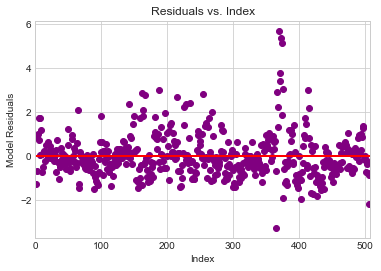

In [18]:
index = np.linspace(1,n,n)
plt.scatter(x = index, y = st_resid, color = "purple")
plt.xlabel("Index")
plt.ylabel("Model Residuals")
plt.title("Residuals vs. Index")
plt.hlines(y = 0, xmin = 0, xmax = n+1, color = "red", linewidth = 2)
plt.xlim(0,n+1)
plt.show()

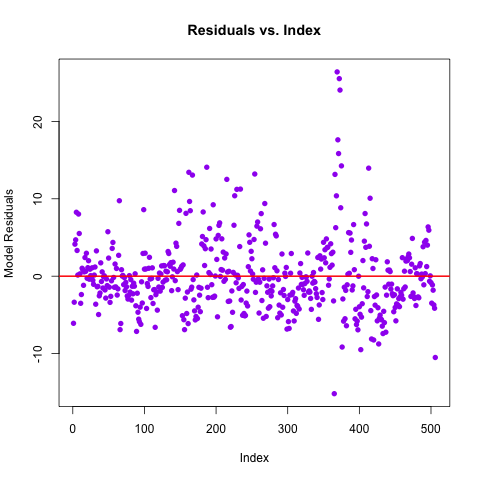

In [19]:
%%R
n <- length(model_red_indus_age$residuals)
index <- 1:n
plot(x = index, y = model_red_indus_age$residuals, col = "purple", pch = 16, xlab = "Index", ylab = "Model Residuals", main = "Residuals vs. Index")
abline(h = 0, col = "red", lwd = 2)

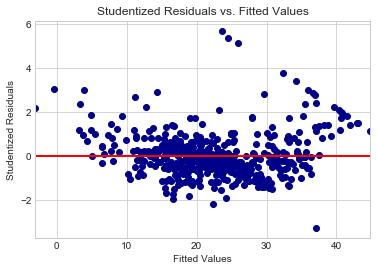

In [20]:
plt.scatter(x = model_red_indus_age.fittedvalues, y = st_resid, color = "darkblue")
plt.xlabel("Fitted Values")
plt.ylabel("Studentized Residuals")
plt.title("Studentized Residuals vs. Fitted Values")
plt.hlines(y = 0, xmin = np.min(model_red_indus_age.fittedvalues), xmax = np.max(model_red_indus_age.fittedvalues), color = "red", linewidth = 2)
plt.xlim(np.min(model_red_indus_age.fittedvalues), np.max(model_red_indus_age.fittedvalues))
plt.show()

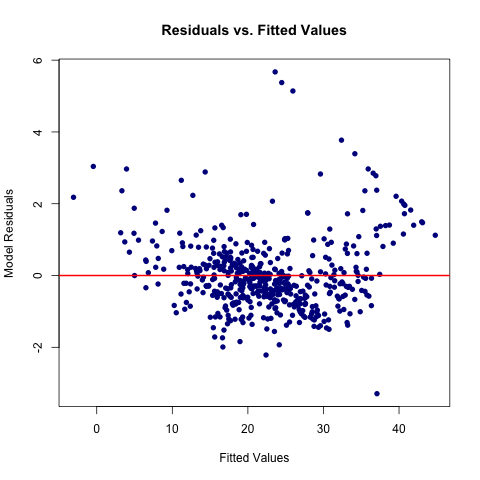

In [21]:
%%R
plot(x = model_red_indus_age$fitted.values, y = st_resid, col = "darkblue", pch = 16, xlab = "Fitted Values", ylab = "Model Residuals", main = "Residuals vs. Fitted Values")
abline(h = 0, col = "red", lwd = 2)

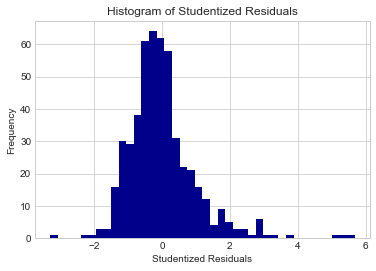

In [22]:
plt.hist(st_resid, color = "darkblue",bins=40)
plt.xlabel("Studentized Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Studentized Residuals")
plt.show()

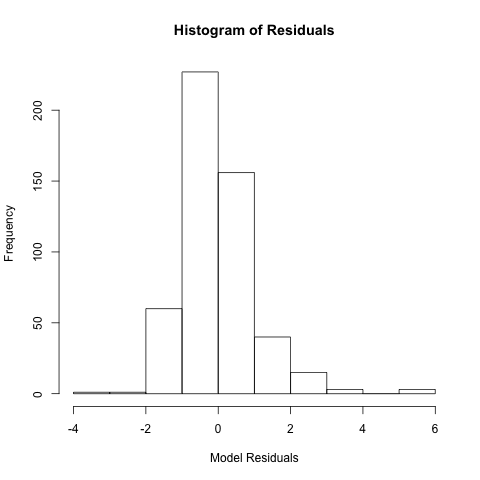

In [23]:
%%R
hist(st_resid, xlab = "Model Residuals", main = "Histogram of Residuals")

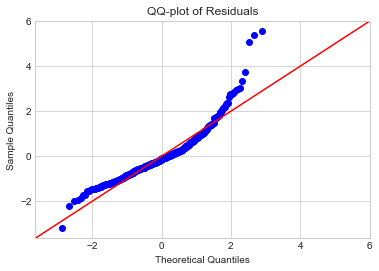

In [24]:
sm.qqplot(model_red_indus_age.resid, stats.norm, fit = True, line = '45')
plt.title("QQ-plot of Residuals")
plt.show()

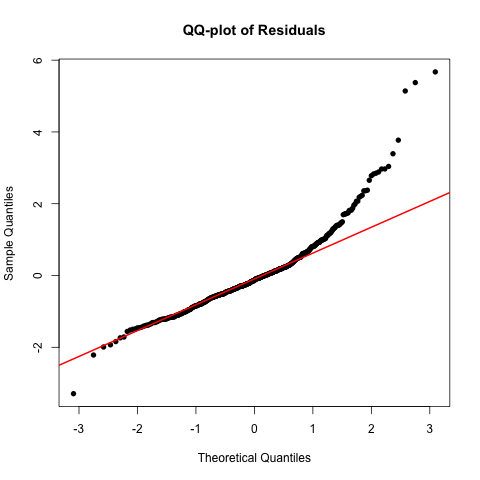

In [25]:
%%R
qqnorm(st_resid, pch = 16, main = "QQ-plot of Residuals")
qqline(st_resid, col = "red", lwd = 2)

<b> Interpretation </b>

The Residuals vs. Index plot show a random scattering of points distributed around zero, which is what we hope to see.  Therefore, the residuals appear to be independent.  However, the Residuals vs. Fitted Values shows a random scattering of points distributed around zero in the middle section, when median home prices are between 10 and 30 thousand, but bends upward at both ends.   This indicates the residuals get larger at both ends — meaning the model does not have constant variance at any given value.   Looking at the histogram of studentized residuals, the residuals appear to be roughly normally distributed.  The QQ plot however, reveals a heavy-tailed residual distribution.

---
** I) Suppose that any one of the residual assumptions is not satisfied. Indicate which model inferences would no longer be valid. **

If any of the residual assumptions are violated, then we have a departure from the normal assumption of a an error that is centered on a mean of zero with a normal distribution.  Then we can't estimate sigma as we typically do since we can't assume its distribution.  The beta parameters however can still be estimated.  As hypothesis testing, confidence intervals, and prediction intervals all involve calculating standard error — but the error is not standard — these inferences would no longer be valid. 